In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

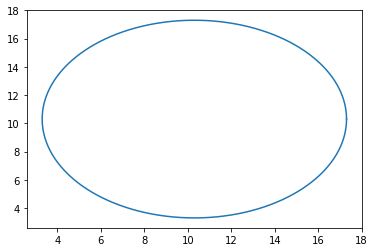

In [2]:
n = np.random.random_sample()*10 + 5
N, h, k ,r = 2000, n, n, 7

x = n + np.random.randn(N, 2)
t = np.array([i for i in range(1, N+1)])*2*np.pi/N
t = np.reshape(t,(N,1))

plt.plot(r*np.cos(t)+h, r*np.sin(t)+k)
plt.show()

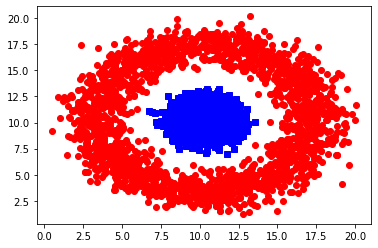

In [3]:
y = np.array([r*np.cos(t)+h+1*np.random.randn(N,1), r*np.sin(t)+k+1*np.random.randn(N,1)])
y = np.reshape(y, (2, N)).T

plt.plot(x[:,0], x[:,1], 'bs', y[:,0], y[:,1], 'ro', lineWidth=1)
plt.show()

In [4]:
# x , y data points
z1 = np.concatenate((x, y), axis=0)
# targets for data points 
target = np.reshape(np.concatenate((np.ones(x.shape[0]), -1*np.ones(y.shape[0])), axis=0), (z1.shape[0], 1))
shuff = np.arange(z1.shape[0])
np.random.shuffle(shuff)
z1_shuff = z1[shuff]
target_shuff = target[shuff]
print(z1.shape, target.shape)

(4000, 2) (4000, 1)


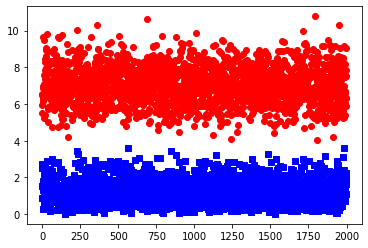

In [5]:
lx = np.reshape(np.sqrt(np.sum((x - np.ones(x.shape)*np.mean(x))**2, axis=1)), (N, 1))
ly = np.reshape(np.sqrt(np.sum((y - np.ones(y.shape)*np.mean(y))**2, axis=1)), (N, 1))

plt.plot(lx, 'bs')
plt.plot(ly, 'ro')
plt.show()

In [15]:
lz1 = np.reshape(np.sqrt(np.sum((z1 - np.ones(z1.shape)*np.mean(z1, axis=0))**2, axis=1)), (N*2, 1))
Xmat = np.concatenate((np.ones(lz1.shape), lz1), axis=1)

W = np.linalg.lstsq(Xmat, target)

/home/ubuntu/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


In [16]:
Wt = W[0]
thr = -Wt[0]/Wt[1]

tar_pred = sigmoid(np.dot(Xmat, Wt))

pred = tar_pred >= 0.5
pred_labels = list(map(lambda x: 1 if x else -1, pred))

pred1 = np.array([lz1[i] for i in range(len(pred_labels)) if pred_labels[i] == 1])
pred2 = np.array([lz1[i] for i in range(len(pred_labels)) if pred_labels[i] == -1])

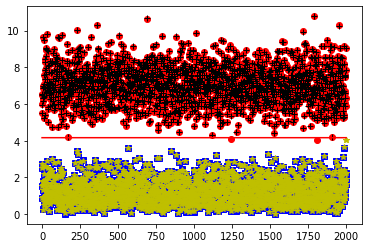

In [19]:
plt.plot(lx,'bs')
plt.plot(ly,'ro')
plt.plot(pred1, 'k+')
plt.plot(pred2, 'y*')
plt.plot(thr*np.ones(N), 'r')
plt.show()

In [18]:
C = confusion_matrix(target, pred_labels, labels=[-1, 1])
print(C)
print("Accuracy: %s" % ((C[0][0]+C[1][1])/np.sum(C)))

[[1998    2]
 [   0 2000]]
Accuracy: 0.9995


In [11]:
# (zx - mean(zx))^2 + (zy - mean(zy))^2 = thr^2
# zy = mean(zy) +/- sqrt(thr^2 - (zx - mean(zx))^2)

m = np.mean(z1, axis=0)
vec = np.arange(m[0] - thr, m[1] + thr + 1, 0.01)
model = []
for a in range(vec.shape[0]):
    zx = vec[a]
    zy = m[1] + np.sqrt(thr**2 - (zx - m[0])**2)
    model.append([zx, zy])
    zy = m[1] - np.sqrt(thr**2 - (zx - m[0])**2)
    model.append([zx, zy])
model = np.array(model)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


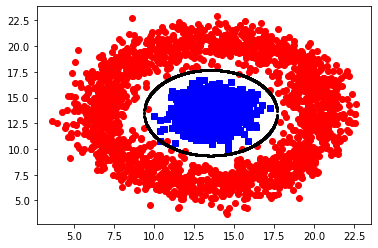

In [12]:
plt.plot(x[:,0], x[:,1], 'bs', y[:,0], y[:,1], 'ro', lineWidth=1)
plt.plot(model[:, 0], model[:, 1], "ko", markersize=2)
plt.show()